In [1]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import pydot

/Users/mshari/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
df = pd.read_excel("nlp_words.xlsx")

In [3]:
df.head(10)

,words,class,number of ayah,quarter,ayah
0,حلًا,postive,92-93,الاول,كل الطعام كان حلًا لبني إسرائيل إلا ما حرم إسر...
1,حرم,negtive,92-93,الاول,كل الطعام كان حلًا لبني إسرائيل إلا ما حرم إسر...
2,الْكَذِبَ,negtive,93-94,الاول,فَمَنِ افْتَرَىٰ عَلَى اللَّهِ الْكَذِبَ مِنْ ...
3,الظَّالِمُونَ,negtive,93-94,الاول,فَمَنِ افْتَرَىٰ عَلَى اللَّهِ الْكَذِبَ مِنْ ...
4,صَدَقَ,postive,94-95,الاول,قُلْ صَدَقَ اللَّهُ ۗ فَاتَّبِعُوا مِلَّةَ إِب...
5,مُبَارَكًا,postive,95-96,الاول,إِنَّ أَوَّلَ بَيْتٍ وُضِعَ لِلنَّاسِ لَلَّذِي...
6,وَهُدًى,postive,95-96,الاول,إِنَّ أَوَّلَ بَيْتٍ وُضِعَ لِلنَّاسِ لَلَّذِي...
7,آمِنًا,postive,96-97,الاول,فِيهِ آيَاتٌ بَيِّنَاتٌ مَقَامُ إِبْرَاهِيمَ ۖ...
8,تَكْفُرُون,negtive,97-98,الاول,قُلْ يَا أَهْلَ الْكِتَابِ لِمَ تَكْفُرُونَ بِ...
9,تَصُدُّونَ,negtive,98-99,الاول,قُلْ يَا أَهْلَ الْكِتَابِ لِمَ تَصُدُّونَ عَن...


In [4]:
df_use = df[['words']]

In [ ]:
df_use

In [ ]:
result = [] 
for value in df["class"]: 
    if value == 'negtive': 
        result.append("Negative") 
    elif value== 'postive': 
        result.append("Positive")
       
df_use["Result"] = result    
       
  

In [6]:
df_use.groupby('Result').describe()

words                   
         count unique    top freq
Result                           
Negative   151    127   عذاب    5
Positive   154    123  امنوا    7

In [7]:
data=[['كُلُّ الطَّعَامِ كَانَ حِلًّا لِبَنِي إِسْرَائِيلَ إِلَّا مَا حَرَّمَ إِسْرَائِيلُ عَلَىٰ نَفْسِهِ مِنْ قَبْلِ أَنْ تُنَزَّلَ التَّوْرَاةُ ۗ قُلْ فَأْتُوا بِالتَّوْرَاةِ فَاتْلُوهَا إِنْ كُنْتُمْ صَادِقِينَ','Neutral']]

In [8]:
test_df=pd.DataFrame(data,columns=['words','Result'])
test_df.head()

,words,Result
0,كُلُّ الطَّعَامِ كَانَ حِلًّا لِبَنِي إِسْرَائ...,Neutral


In [9]:
from IPython.display import Markdown, display
for i in range(8):
    display(Markdown('> '+df['ayah'][i]))
    print('--------------------------------------')

> كل الطعام كان حلًا لبني إسرائيل إلا ما حرم إسرائيل على نفسه من قبل أن تنزل التوراة، قل فأتوا بالتوراة فاتلوها إن كنتم صادقين

--------------------------------------


> كل الطعام كان حلًا لبني إسرائيل إلا ما حرم إسرائيل على نفسه من قبل أن تنزل التوراة، قل فأتوا بالتوراة فاتلوها إن كنتم صادقين

--------------------------------------


> فَمَنِ افْتَرَىٰ عَلَى اللَّهِ الْكَذِبَ مِنْ بَعْدِ ذَٰلِكَ فَأُولَٰئِكَ هُمُ الظَّالِمُونَ

--------------------------------------


> فَمَنِ افْتَرَىٰ عَلَى اللَّهِ الْكَذِبَ مِنْ بَعْدِ ذَٰلِكَ فَأُولَٰئِكَ هُمُ الظَّالِمُونَ

--------------------------------------


> قُلْ صَدَقَ اللَّهُ ۗ فَاتَّبِعُوا مِلَّةَ إِبْرَاهِيمَ حَنِيفًا وَمَا كَانَ مِنَ الْمُشْرِكِينَ

--------------------------------------


> إِنَّ أَوَّلَ بَيْتٍ وُضِعَ لِلنَّاسِ لَلَّذِي بِبَكَّةَ مُبَارَكًا وَهُدًى لِلْعَالَمِينَ

--------------------------------------


> إِنَّ أَوَّلَ بَيْتٍ وُضِعَ لِلنَّاسِ لَلَّذِي بِبَكَّةَ مُبَارَكًا وَهُدًى لِلْعَالَمِينَ

--------------------------------------


> فِيهِ آيَاتٌ بَيِّنَاتٌ مَقَامُ إِبْرَاهِيمَ ۖ وَمَنْ دَخَلَهُ كَانَ آمِنًا ۗ وَلِلَّهِ عَلَى النَّاسِ حِجُّ الْبَيْتِ مَنِ اسْتَطَاعَ إِلَيْهِ سَبِيلًا ۚ وَمَنْ كَفَرَ فَإِنَّ اللَّهَ غَنِيٌّ عَنِ الْعَالَمِينَ

--------------------------------------


In [10]:
len(df)

305

In [11]:
df['class'].value_counts()

class
postive    154
negtive    151
Name: count, dtype: int64

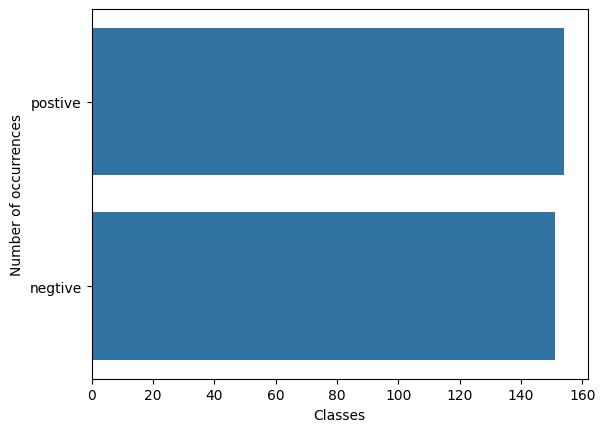

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df.iloc[:,1])
plt.xlabel('Classes')
plt.ylabel('Number of occurrences')
plt.show()